#Projet d'apprentissage statistique appliqué
#Prévision des dépenses de santé


Ce projet a pour but de prédire les dépenses de santé en 2023 d'un panel d'individus à partir de leurs dépenses de santé en 2022, ainsi que de leurs caractéristiques socio-démographiques et économiques.
Pour ce faire, nous utiliserons des données sont issues \textit{Medical Expenditure Panel Survey (MEPS)}. Cette étude fournit des données de panel détaillées sur les ménages, leurs caractéristiques socio-démographiques et économiques, ainsi que l'ensemble de leurs dépenses de santé sur la période 2022-2023 pour 8228 individus.

In [3]:
# Installation et chargement des requirements
%pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 78.7 MB/s  0:00:08m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 87.3 MB/s  0:00:05m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 101.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 80.7 MB/s  0:00:016m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 3.3 MB/s  0:00:00m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 77.4 MB/s  0:00:07m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 92.8 MB/s  0:00:02m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 74.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 94.4 MB/s  0:00:006m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 102.0 MB/s  0:00:020:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 MB 81.0 MB/s  0:00:03m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# 1. Téléchargement des données et création du dataframe

Les données du medical panel expenditure ont été téléchargées depuis l'url
https://meps.ahrq.gov/mepsweb/data_stats/download_data_files.jsp.
 Nous allons à présent créer un dataframe nous permettant de mettre en oeuvre
les algorithmes de Machine Learning pour la prévision des dépenses de santé.

In [ ]:
# Nous chargeons les bibliothèques nécessaires pour pouvoir nous placer dans
# un environnement R pour la création du dataframe.
%load_ext rpy2.ipython


In [5]:
%%R

# Chargement des packages
library(haven)
library(dplyr)
library(tidyr)
library(readr)

In [ ]:
%%R

# Augmentation de la limite de temps
options(timeout = 600)

# Nous créons une fonction pour le téléchargement des 11 fichiers que nous
#nous utiliserons
#Les arguments de cette fonction sont:
# - urls : les urls de téléchargement
# - zipnames : les noms des fichiers zip à télécharger
# - objnames : une liste contenant les nouveaux noms attribués à ces fichiers
# - outdir : le nom du dossier où seront stockés les fichiers renommés

load_meps_zip <- function(urls, zipnames, objnames, outdir = "meps_data") {

  #création du dossier outdir
  dir.create(outdir, showWarnings = FALSE)

  for (i in seq_along(urls)) {
    url      <- urls[i]
    zipfile  <- file.path(outdir, zipnames[i])
    objname  <- objnames[i]

    #  Téléchargement du fichier zip
    download.file(url, destfile = zipfile, mode = "wb")

    #  Décompression et extraction du fichier .dta
    unzip_dir <- file.path(outdir, tools::file_path_sans_ext(zipnames[i]))
    dir.create(unzip_dir, showWarnings = FALSE)
    unzip(zipfile, exdir = unzip_dir)
    dta_file <- list.files(unzip_dir, pattern = "\\.dta$", full.names = TRUE)

    # Nous téléchargeons le fichier .dta et le renommons
    assign(objname, read_dta(dta_file), envir = .GlobalEnv)
  }
}

# Application de la fonction -------------------------------------------

urls <- c(
  "https://meps.ahrq.gov/mepsweb/data_files/pufs/h243/h243dta.zip",
  "https://meps.ahrq.gov/mepsweb/data_files/pufs/h252/h252dta.zip",
  "https://meps.ahrq.gov/mepsweb/data_files/pufs/h251/h251dta.zip",
  "https://meps.ahrq.gov/mepsweb/data_files/pufs/h239a/h239adta.zip",
  "https://meps.ahrq.gov/mepsweb/data_files/pufs/h239b/h239bdta.zip",
  "https://meps.ahrq.gov/mepsweb/data_files/pufs/h239c/h239cdta.zip",
  "https://meps.ahrq.gov/mepsweb/data_files/pufs/h239d/h239ddta.zip",
  "https://meps.ahrq.gov/mepsweb/data_files/pufs/h239e/h239edta.zip",
  "https://meps.ahrq.gov/mepsweb/data_files/pufs/h239f/h239fdta.zip",
  "https://meps.ahrq.gov/mepsweb/data_files/pufs/h239g/h239gdta.zip",
  "https://meps.ahrq.gov/mepsweb/data_files/pufs/h239h/h239hdta.zip"
)

zipnames <- c("h243.zip", "h252.zip", "h251.zip", "h239a.dta", "h239b.dta",
              "h239c.dta", "h239d.dta", "h239e.dta", "h239f.dta", "h239g.dta",
              "h239h.dta")

objnames <- c("full_year_2022", "longitudinal", "full_year_2023",
              "prescribed_medicines_2022", "dental_2022","others_2022",
              "hospitals_2022", "emergency_room_2022", "outpatients_visits_2022",
              "Office_Based_Medical_Provider_2022", "home_health_2022")

load_meps_zip(urls, zipnames, objnames)




Exception ignored from cffi callback <function _processevents at 0x7f3855f66160>:
Traceback (most recent call last):
  File "/opt/python/lib/python3.13/site-packages/rpy2/rinterface_lib/callbacks.py", line 308, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
KeyboardInterrupt: 


In [7]:
%%R

# Nous agrégeons les dépenses pour chaque individu et pour chaque mois
# dans les fichiers détaillant les dépenses par poste de façon à obtenir
# - les dépenses mensuelles de chaque individu par poste
#(variables de type exp_poste_1, exp_poste2... pour le poste "poste")
# - une variable détaillant la dépense totale en 2022 pour ce poste pour chaque
# individu (variable exp_poste_total)

# Les cinq premiers fichiers sont traités de façon analogue
agg_dental <- dental_2022 %>%
#nous sommons les dépenses par mois et par individu
  group_by(DUPERSID, DVDATEMM) %>%
  summarise(exp_dental = sum(DVXP22X, na.rm = TRUE), .groups = "drop") %>%
  # Nous créons une colonne de dépense par mois
  pivot_wider(
    names_from = DVDATEMM,
    values_from = exp_dental,
    names_prefix = "exp_dental_"
  ) %>%
  # Nous ajoutons la somme annuelle
  rowwise() %>%
  mutate(exp_dental_total = sum(c_across(starts_with("exp_dental_")), na.rm = TRUE)) %>%
  ungroup()

agg_outpatient <- outpatients_visits_2022 %>%
  group_by(DUPERSID, OPDATEMM) %>%
  summarise(exp_outpatient = sum(OPXP22X, na.rm = TRUE), .groups = "drop") %>%
  pivot_wider(
    names_from = OPDATEMM,
    values_from = exp_outpatient,
    names_prefix = "exp_outpatient_"
  ) %>%
  rowwise() %>%
  mutate(exp_outpatient_total = sum(c_across(starts_with("exp_outpatient_")), na.rm = TRUE)) %>%
  ungroup()

agg_office <- Office_Based_Medical_Provider_2022 %>%
  group_by(DUPERSID, OBDATEMM ) %>%
  summarise(exp_office = sum(OBXP22X, na.rm = TRUE), .groups = "drop") %>%
  pivot_wider(
    names_from = OBDATEMM ,
    values_from = exp_office,
    names_prefix = "exp_office_"
  ) %>%
  rowwise() %>%
  mutate(exp_office_total = sum(c_across(starts_with("exp_office_")), na.rm = TRUE)) %>%
  ungroup()

agg_er <- emergency_room_2022 %>%
  group_by(DUPERSID, ERDATEMM) %>%
  summarise(exp_er = sum(ERXP22X, na.rm = TRUE), .groups = "drop") %>%
  pivot_wider(
    names_from = ERDATEMM,
    values_from = exp_er,
    names_prefix = "exp_er_"
  ) %>%
  rowwise() %>%
  mutate(exp_er_total = sum(c_across(starts_with("exp_er_")), na.rm = TRUE)) %>%
  ungroup()

agg_home <-  home_health_2022 %>%
  group_by(DUPERSID, HHDATEMM) %>%
  summarise(exp_home = sum(HHXP22X, na.rm = TRUE), .groups = "drop") %>%
  pivot_wider(
    names_from = HHDATEMM,
    values_from = exp_home,
    names_prefix = "exp_home_"
  ) %>%
  rowwise() %>%
  mutate(exp_home_total = sum(c_across(starts_with("exp_home_")), na.rm = TRUE)) %>%
  ungroup()


Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : 
  object 'dental_2022' not found


RInterpreterError: Failed to parse and evaluate line '\n# Nous agrégeons les dépenses pour chaque individu et pour chaque mois\n# dans les fichiers détaillant les dépenses par poste de façon à obtenir\n# - les dépenses mensuelles de chaque individu par poste\n#(variables de type exp_poste_1, exp_poste2... pour le poste "poste")\n# - une variable détaillant la dépense totale en 2022 pour ce poste pour chaque\n# individu (variable exp_poste_total)\n\n# Les cinq premiers fichiers sont traités de façon analogue\nagg_dental <- dental_2022 %>%\n#nous sommons les dépenses par mois et par individu\n  group_by(DUPERSID, DVDATEMM) %>%\n  summarise(exp_dental = sum(DVXP22X, na.rm = TRUE), .groups = "drop") %>%\n  # Nous créons une colonne de dépense par mois\n  pivot_wider(\n    names_from = DVDATEMM,\n    values_from = exp_dental,\n    names_prefix = "exp_dental_"\n  ) %>%\n  # Nous ajoutons la somme annuelle\n  rowwise() %>%\n  mutate(exp_dental_total = sum(c_across(starts_with("exp_dental_")), na.rm = TRUE)) %>%\n  ungroup()\n\nagg_outpatient <- outpatients_visits_2022 %>%\n  group_by(DUPERSID, OPDATEMM) %>%\n  summarise(exp_outpatient = sum(OPXP22X, na.rm = TRUE), .groups = "drop") %>%\n  pivot_wider(\n    names_from = OPDATEMM,\n    values_from = exp_outpatient,\n    names_prefix = "exp_outpatient_"\n  ) %>%\n  rowwise() %>%\n  mutate(exp_outpatient_total = sum(c_across(starts_with("exp_outpatient_")), na.rm = TRUE)) %>%\n  ungroup()\n\nagg_office <- Office_Based_Medical_Provider_2022 %>%\n  group_by(DUPERSID, OBDATEMM ) %>%\n  summarise(exp_office = sum(OBXP22X, na.rm = TRUE), .groups = "drop") %>%\n  pivot_wider(\n    names_from = OBDATEMM ,\n    values_from = exp_office,\n    names_prefix = "exp_office_"\n  ) %>%\n  rowwise() %>%\n  mutate(exp_office_total = sum(c_across(starts_with("exp_office_")), na.rm = TRUE)) %>%\n  ungroup()\n\nagg_er <- emergency_room_2022 %>%\n  group_by(DUPERSID, ERDATEMM) %>%\n  summarise(exp_er = sum(ERXP22X, na.rm = TRUE), .groups = "drop") %>%\n  pivot_wider(\n    names_from = ERDATEMM,\n    values_from = exp_er,\n    names_prefix = "exp_er_"\n  ) %>%\n  rowwise() %>%\n  mutate(exp_er_total = sum(c_across(starts_with("exp_er_")), na.rm = TRUE)) %>%\n  ungroup()\n\nagg_home <-  home_health_2022 %>%\n  group_by(DUPERSID, HHDATEMM) %>%\n  summarise(exp_home = sum(HHXP22X, na.rm = TRUE), .groups = "drop") %>%\n  pivot_wider(\n    names_from = HHDATEMM,\n    values_from = exp_home,\n    names_prefix = "exp_home_"\n  ) %>%\n  rowwise() %>%\n  mutate(exp_home_total = sum(c_across(starts_with("exp_home_")), na.rm = TRUE)) %>%\n  ungroup()\n'.
R error message: "Error in (function (expr, envir = parent.frame(), enclos = if (is.list(envir) ||  : \n  object 'dental_2022' not found"

In [ ]:
%%R

#Le fichier others couvre des dépenses du type achat de lunettes, appareils
# auditifs, matériel médical...
# Le mois d'achat n'est pas spécifié mais comme ces achats sont des achats
# concernant en majorité des dépenses ponctuelles pour une utilisation
# sur le long terme, nous considérons qu'il n'est pas nécessaire de les
# attacher à un mois donné et nous les avons réépartis uniformément
# sur les douze mois de l'année 2022

# Nous répartissons la dépense uniformément sur 12 mois
others_monthly <- others_2022 %>%
# répartition uniforme de la dépense pour ce poste sur les douze mois
  mutate(
    exp_others_month = OMXP22X / 12  ) %>%
  # Création de 12 lignes par individu (une pour chaque mois)
  tidyr::crossing(month = 1:12) %>%
  group_by(DUPERSID, month) %>%
  summarise(exp_others = sum(exp_others_month), .groups = "drop")

# Nous calculons la dépense par mois et la dépense totale pour chaque individu
# pour ce poste
agg_others <-  others_monthly %>%
  # Nous créons une colonne de dépense par mois
  pivot_wider(
    names_from = month,
    values_from = exp_others,
    names_prefix = "exp_others_"
  ) %>%
  # Nous calculons la dépense totale pour ce poste pour chaque individu
  rowwise() %>%
  mutate(exp_others_total = sum(c_across(starts_with("exp_others_")), na.rm = TRUE)) %>%
  ungroup()

In [ ]:
%%R

#Le fichier hospitals nécessite un traitement particulier puisque les mois
#où la dépense est effectuée ne sont pas détaillés. A contrario, le fichier
# contient la date d'entrée et de sortie, nous répartirons donc uniformément la
# dépense entre les mois concernés par l'hospitalisation

#Répartition uniforme de la dépense entre le mois de début et le mois de fin de
#l'hospitalisation et création des variables exp_hospitals_month
# (dépenses d'hoispitalisation mensuelles)

hospitals_monthly <- hospitals_2022 %>%
#On supprime les lignes pour lesquelles la date de fin d'hospitalisation n'est pas connue
filter(IPENDMM != -8)%>%
# Calcul du nombre de mois d'hospitalisation selon l'année de début
mutate(
    n_months = case_when(
      IPBEGYR == 2022 ~ IPENDMM - IPBEGMM + 1,
      IPBEGYR == 2021 ~  (12 - IPBEGMM + 1) + IPENDMM,
      TRUE ~ NA_real_
    )
  ) %>%
  #Calcul de la dépense mensuelle
mutate(exp_hospitals_month = IPXP22X / n_months)%>%
rowwise() %>%
#Liste des mois concernés par l'hospitalisation
mutate(
    month = case_when(
      IPBEGYR == 2022 ~list(seq(IPBEGMM, IPENDMM)),
      IPBEGYR == 2021 ~ list(seq(1, IPENDMM)),
      TRUE ~ list(NA_integer_)
    )
)%>%
unnest(month) %>%
ungroup() %>%
group_by(DUPERSID, month) %>%
# Les dépenses mensuelles sont affectées à chaque colonne correspondante
summarise(exp_hospitals = sum(exp_hospitals_month), .groups = "drop") %>%
complete(DUPERSID, month = 1:12, fill = list(exp_hospitals = 0))

# On crée une colonne exp_2021_total contenant les dépenses affectées à 2021
#dans le cas d'hospitalisations débutées en 2021 pour la cohérence des totaux

exp_2021 <- hospitals_2022 %>%
  filter(IPENDMM != -8, IPBEGYR == 2021) %>%
  mutate(
    n_months = (12 - IPBEGMM + 1) + IPENDMM,
    exp_hospitals_2021 = (IPXP22X / n_months) * (12 - IPBEGMM + 1)
  ) %>%
  group_by(DUPERSID) %>%
  summarise(exp_hospitals_2021_total = sum(exp_hospitals_2021))


agg_hospital <- hospitals_monthly %>%
  pivot_wider(
    names_from = month,
    values_from = exp_hospitals,
    names_prefix = "exp_hospitals_"
  ) %>%
  rowwise() %>%
  mutate(
    # total  de la dépense imputé à 2022
    exp_hospitals_2022_total = sum(
      c_across(matches("^exp_hospitals_[0-9]+$")),
      na.rm = TRUE
    )
  ) %>%
  ungroup() %>%
  # on joint la dépense imputée à 2021
  left_join(exp_2021, by = "DUPERSID")



In [ ]:
%%R
# La date d'achat pour les dépenses en pharmacie n'est pas connue.
# Nous avons fait le choix de répartir uniformément la dépense sur les douze
#mois de l'année afin de conserver le signal faible et précurseur des dépenses
#de pharmacie sur les dépenses de santé, tout en évitant de surpondérer
# artificiellement un mois particulier.

# Nous répartissons la dépense uniformément sur 12 mois
medicines_monthly <- prescribed_medicines_2022 %>%
  mutate(exp_medicines_month = RXXP22X / 12) %>%
  tidyr::crossing(month = 1:12) %>%
  group_by(DUPERSID, month) %>%
  summarise(
    exp_medicines = sum(exp_medicines_month, na.rm = TRUE),
    .groups = "drop"
  )


agg_medicines <- medicines_monthly %>%
  pivot_wider(
    names_from = month,
    values_from = exp_medicines,
    names_prefix = "exp_medicines_"
  ) %>%
  rowwise() %>%
  mutate(
    exp_medicines_total = sum(
      c_across(starts_with("exp_medicines_")),
      na.rm = TRUE
    )
  ) %>%
  ungroup()

In [ ]:
%%R

# Les variables précédemment créées détaillant les dépenses agrégées par poste
# pour chaque individu sont jointes aux fichiers full_year_2022 et longitudinal
# pour inclure certaines caractéristiques socio-démographiques et économiques à l'étude.

# DUPERSID présents dans hospitals_2022 mais supprimés dans agg_hospitals
# (du fait de l'absence de l'information sur la durée d'hospitalisation)
ids_removed <- hospitals_2022 %>%
  filter(IPENDMM == -8 ) %>%
  pull(DUPERSID)


# CRéation du dataframe avec l'ensemble des dépenses mensuelles par postes
# et les caractéristiques socio-démographiques et économiques
all_expenses <- full_year_2022 %>%
  filter(!DUPERSID %in% ids_removed)  %>%
  select(DUPERSID,  EDUCYR,  TTLP22X, FAMINC22, AGE22X, TOTEXP22  ) %>%
  left_join(full_year_2023 %>% select(DUPERSID,  TOTEXP23), by= "DUPERSID") %>%
  left_join(longitudinal %>% select(DUPERSID), by= "DUPERSID")%>%
  left_join(agg_dental, by="DUPERSID") %>%
  left_join(agg_hospital, by="DUPERSID") %>%
  left_join(agg_outpatient, by="DUPERSID") %>%
  left_join(agg_office, by="DUPERSID") %>%
  left_join(agg_er, by="DUPERSID") %>%
  left_join(agg_home, by="DUPERSID") %>%
  left_join(agg_others, by="DUPERSID") %>%
  left_join(agg_medicines, by="DUPERSID")

  #Toutes nos variables étant positives, nous supprimons toutes les lignes
  #contenant des valeurs négatives (qui indiquent que la modalité est inconnue
  #pour l'individu concerné d'après la documentation )

 all_expenses_clean <- all_expenses %>%
  filter(if_all(everything(), ~ is.na(.x) | .x >= 0))%>%
  #On ne conserve que les individus présents dans le fichier longitudinal
  filter(DUPERSID %in% longitudinal$DUPERSID)


  n <- nrow(all_expenses)
  n_removed <- n - nrow(all_expenses_clean)
  cat("Le nombre de lignes supprimées est :", n_removed, "\n")
  cat("Le nombre de lignes restantes est :", nrow(all_expenses_clean), "\n")


Le nombre de lignes supprimées est : 14827 
Le nombre de lignes restantes est : 7598 
[1] 5713


In [ ]:
%%R

# Contrôle de cohérence : nous vérifions que la somme des dépenses pour chaque
# poste est égale à la dépense totale en 2022 renseignée dans le fichier longitudinal

expense_cols <- grep("^exp_.*_total$", names(all_expenses_clean), value = TRUE)

check <- all_expenses_clean %>%
  rowwise() %>%
  mutate(sum_expenses = sum(c_across(all_of(expense_cols)), na.rm = TRUE)) %>%
  ungroup() %>%
  mutate(diff = TOTEXP22 - sum_expenses)



summary(check$diff)

#Nous constatons que la différence entre les deux valeurs est comprise entre
# -2.3 et 13.5 et pouvons considérer qu'elle n'est due qu'à l'utilisation d'arrondis


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1.72000 -0.22000  0.00000  0.02885  0.27000 13.50000 


In [ ]:
%%R

# Nous allons à présent créer les variables dépenses mensuelles agrégées (dep_janvier, dep_février...)
# utiles pour notre étude.

# Nous créons des variables dépenses totales mensuelles (dep_janvier...)
all_expenses_clean <- all_expenses_clean %>%
  rowwise() %>%
  mutate(
    dep_janvier  = sum(c_across(ends_with("_1")), na.rm = TRUE),
    dep_fevrier  = sum(c_across(ends_with("_2")), na.rm = TRUE),
    dep_mars     = sum(c_across(ends_with("_3")), na.rm = TRUE),
    dep_avril    = sum(c_across(ends_with("_4")), na.rm = TRUE),
    dep_mai      = sum(c_across(ends_with("_5")), na.rm = TRUE),
    dep_juin     = sum(c_across(ends_with("_6")), na.rm = TRUE),
    dep_juillet  = sum(c_across(ends_with("_7")), na.rm = TRUE),
    dep_aout     = sum(c_across(ends_with("_8")), na.rm = TRUE),
    dep_sept     = sum(c_across(ends_with("_9")), na.rm = TRUE),
    dep_oct      = sum(c_across(ends_with("_10")), na.rm = TRUE),
    dep_nov      = sum(c_across(ends_with("_11")), na.rm = TRUE),
    dep_dec      = sum(c_across(ends_with("_12")), na.rm = TRUE)
  ) %>%
  ungroup()




In [ ]:
  %%R
# Nous créons d'autres variables utiles pour notre étude, à savoir:
# - Les dépenses des 6 derniers mois (dep_6_mois)
# - Les dépenses des 3 derniers mois (dep_3_mois)
# - Nombre de mois où la dépense est supérieure à la dépense mensuelle moyenne (nbre_au_dessus_moyenne)
# - Création d'une variable tendance obtenue en ajustant une droite (régression linéaire)
# sur les dernières dépenses mensuelles de la période d’observation, puis en extrayant la pente.
# - Création de la variable ep_aigue qui indique si la dépense mensuelle la plus élevée est
#supérieure au triple de la dépense mensuelle moyenne
# -Création de la variable dépense mensuelle maximale dep_max

#Nous créons une liste contenant les variables de dépenses mensuelles
dep_months <- c(
  "dep_janvier", "dep_fevrier", "dep_mars", "dep_avril",
  "dep_mai", "dep_juin", "dep_juillet", "dep_aout",
  "dep_sept", "dep_oct", "dep_nov", "dep_dec"
)

  # Nous créons la variable dépense sur les 3 derniers mois
  all_expenses_clean <- all_expenses_clean %>%
  mutate(
    dep_3_mois = rowSums(across(matches("_(10|11|12)$")), na.rm = TRUE)
  )

  # Nous créons la variable dépense sur les 6 derniers mois
  all_expenses_clean <- all_expenses_clean %>%
  mutate(
    dep_6_mois = rowSums(across(matches("_(7|8|9|10|11|12)$")), na.rm = TRUE)
  )

  # Nous créons la variable nbre_au_dessus_moyenne
  all_expenses_clean <- all_expenses_clean %>%
  rowwise() %>%
  mutate(
    # calcul du nombre de mois dont la dépense dépasse la moyenne
    nbre_au_dessus_moyenne =
      sum(c_across(dep_janvier:dep_dec) >  (TOTEXP22 / 12), na.rm = TRUE)
  ) %>%
  ungroup()

#Nous créons la variable tendance
all_expenses_clean <- all_expenses_clean %>%
  rowwise() %>%
  mutate(
    tendance = {
      #Selection des trois derniers mois
      mois <- 1:3
      dep_mensuelles <- c(dep_oct, dep_nov, dep_dec)
      # Calcul de la pente de la régression linéaire
      lm(dep_mensuelles ~ mois)$coefficients[2]
    }
  ) %>%
  ungroup()

# Nous créons les variables ep_aigue et dep_max
all_expenses_clean <- all_expenses_clean %>%
  rowwise() %>%
  mutate(
    # Dépense mensuelle maximale
    dep_max     = max(c_across(all_of(dep_months)), na.rm = TRUE),
    ep_aigue    = if_else(dep_max > 5 *TOTEXP22 / 12, 1, 0)
  ) %>%
  ungroup()



In [ ]:
%%R

# Nous créons les variables ep_aigue et dep_max
all_expenses_clean <- all_expenses_clean %>%
  rowwise() %>%
  mutate(
    # Dépense mensuelle maximale
    dep_max     = max(c_across(all_of(dep_months)), na.rm = TRUE),
    # Présence d'une dépense mensuelle aigue: supérieure à 5 fois la dépense moyenne
    ep_aigue    = if_else(dep_max > 5 * TOTEXP22 / 12, 1, 0)
  ) %>%
  ungroup()


In [ ]:
%%R

# Nous enregistrons le dataframe crée
write.csv(all_expenses_clean, "all_expenses_clean.csv", row.names = FALSE)

# 2. Familiarisation avec les données: quelques statistiques descriptives

In [4]:
# Nous chargeons les packages nécessaires

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn


In [5]:
# Nous lisons le fichier all_expenses_clean créé précédemment avec python
all_expenses_clean = pd.read_csv("all_expenses_clean.csv", sep=",")

# Nous vérifions quelles colonnes contiennent des valeurs manquantes
pd.set_option('display.max_rows', None)#  option pour voir toutes les entrées de la Series
all_expenses_clean.count()
#pd.reset_option('display.max_rows') #nous supprimons l'option

# Nous remarquons que les variables socio-démographiques et économiques ne contiennent pas de NA.
# Les seules variables contenant des NA sont les dépenses par poste et seront donc remplacées par 0.



DUPERSID                    7598
EDUCYR                      7598
TTLP22X                     7598
FAMINC22                    7598
AGE22X                      7598
TOTEXP22                    7598
TOTEXP23                    7570
exp_dental_1                 598
exp_dental_3                 740
exp_dental_5                 562
exp_dental_7                 609
exp_dental_9                 572
exp_dental_10                529
exp_dental_11                530
exp_dental_12                570
exp_dental_8                 730
exp_dental_6                 619
exp_dental_2                 621
exp_dental_4                 540
exp_dental_total            3560
exp_hospitals_1              490
exp_hospitals_2              490
exp_hospitals_3              490
exp_hospitals_4              490
exp_hospitals_5              490
exp_hospitals_6              490
exp_hospitals_7              490
exp_hospitals_8              490
exp_hospitals_9              490
exp_hospitals_10             490
exp_hospit

Nous commencons par réaliser un histogramme détaillant la répartiton des dépenses de santé en 2022 par poste de dépense (au niveau de notre population).

Nous remarquons que les dépenses de pharmacie (exp_medicines_total), les consultations médicales (exp_home_total) et les dépenses hospitalières (exp_hospitals_2022_total, exp_outpatient_total) constituent les postes de dépenses les plus importants.

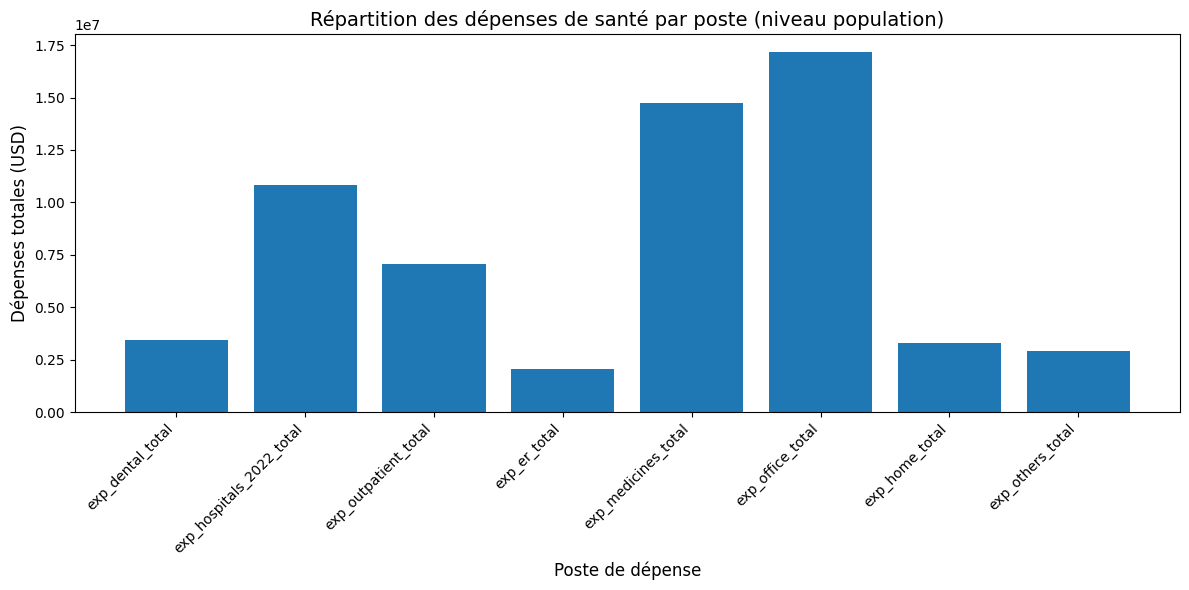

In [6]:
# Liste des postes à agréger
depenses_postes = [
    "exp_dental_total",
    "exp_hospitals_2022_total",
    "exp_outpatient_total",
    "exp_er_total",
    "exp_medicines_total",
    "exp_office_total",
    "exp_home_total",
    "exp_others_total"
]

# Calcul les dépenses totales par poste (somme sur la population)
total_depenses_postes = all_expenses_clean[depenses_postes].sum()

# Création du graphique
plt.figure(figsize=(12, 6))
plt.bar(total_depenses_postes.index,total_depenses_postes.values)

# Titre et légendes
plt.title("Répartition des dépenses de santé par poste (niveau population)", fontsize=14)
plt.xlabel("Poste de dépense", fontsize=12)
plt.ylabel("Dépenses totales (USD)", fontsize=12)

# Rotation des labels pour plus de lisibilité
plt.xticks(rotation=45, ha='right')

# Affichage
plt.tight_layout()
plt.show()






Nous réalisons ensuite un histogramme détaillant la répartiton des dépenses de santé en 2022 par mois (au niveau de notre population).

Nous remarquons que les dépenses de santé sont relativement stables au cours de l'année.

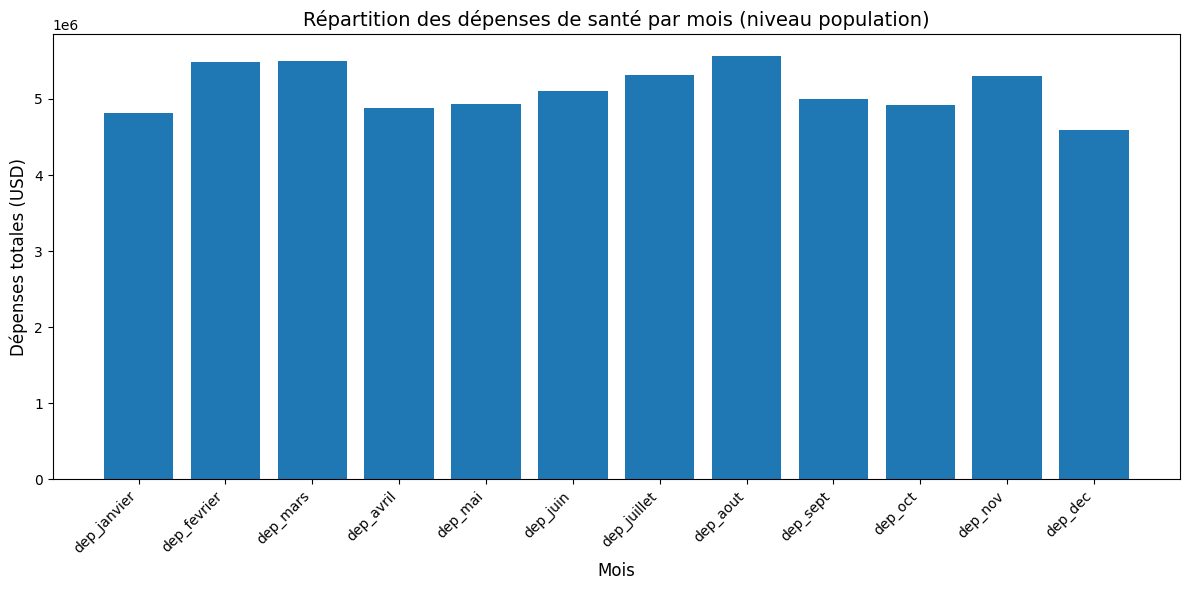

In [7]:
# Liste des postes à agréger
var_mensuelles = [
 "dep_janvier", "dep_fevrier", "dep_mars", "dep_avril",
  "dep_mai", "dep_juin", "dep_juillet", "dep_aout",
  "dep_sept", "dep_oct", "dep_nov", "dep_dec"
]

# Calcul les dépenses totales par mois (somme sur la population)
total_mensuel = all_expenses_clean[var_mensuelles].sum()

# Création du graphique
plt.figure(figsize=(12, 6))
plt.bar(total_mensuel.index,total_mensuel.values)

# Titre et légendes
plt.title("Répartition des dépenses de santé par mois (niveau population)", fontsize=14)
plt.xlabel("Mois", fontsize=12)
plt.ylabel("Dépenses totales (USD)", fontsize=12)

# Rotation des labels pour plus de lisibilité
plt.xticks(rotation=45, ha='right')

# Affichage
plt.tight_layout()
plt.show()






Nous créons ensuite un graphique détaillant la proportion de valeurs différentes de NA ou 0 pour chaque poste de dépense.
Nous remarquons tout d'abord qu'un nombre important d'individus présente des dépenses nulles pour certains postes, voire pour le total des dépenses.
Il apparait également que les dépenses en pharmacie, de consultations et dentaires sont les plus fréquentes et les dépenses d'hospitalisation ou de soins à domicile sont les moins fréquentes.

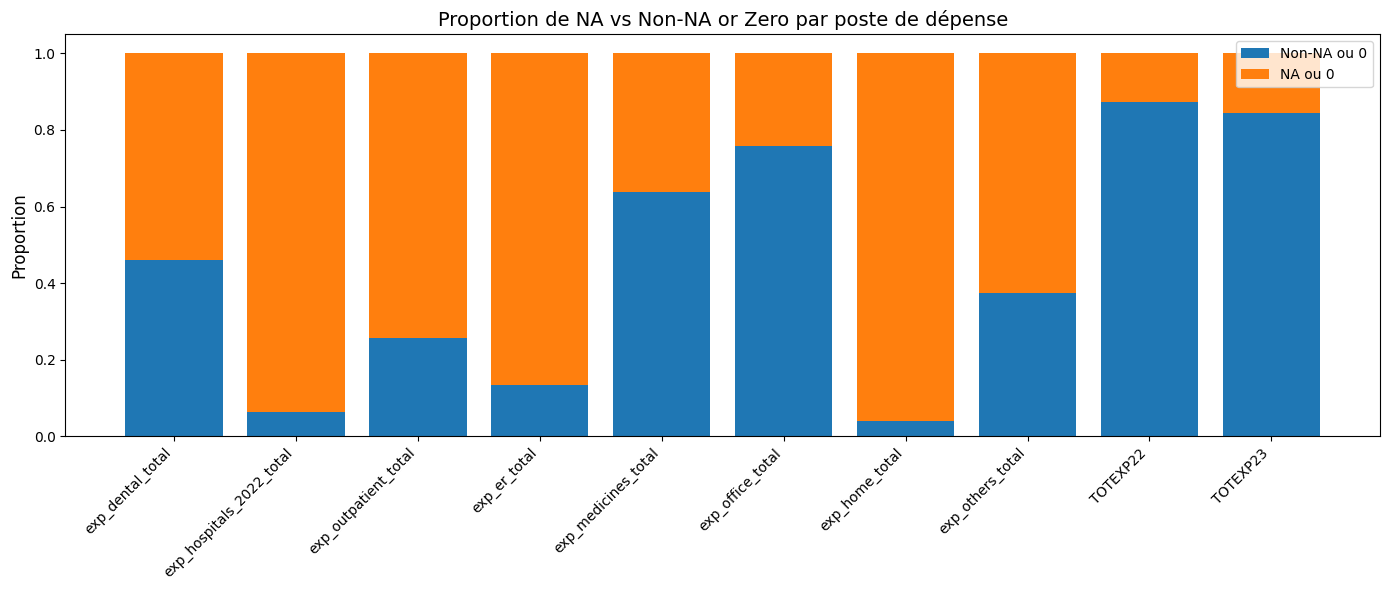

In [8]:


# Liste des postes à analyser
depenses_postes = [
    "exp_dental_total",
    "exp_hospitals_2022_total",
    "exp_outpatient_total",
    "exp_er_total",
    "exp_medicines_total",
    "exp_office_total",
    "exp_home_total",
    "exp_others_total", "TOTEXP22", "TOTEXP23"
]

# Proportion de valeurs non-NA et différentes de zéro
non_na_or_zero = (
    all_expenses_clean[depenses_postes].notna() &
    (all_expenses_clean[depenses_postes] != 0)
).mean()

# Proportion de valeurs NA (strictement NA)
na = 1 - non_na_or_zero

# Création du graphique
plt.figure(figsize=(14, 6))

plt.bar(non_na_or_zero.index, non_na_or_zero.values, label="Non-NA ou 0")
plt.bar(na.index, na.values, bottom=non_na_or_zero.values, label="NA ou 0")

plt.title("Proportion de NA vs Non-NA or Zero par poste de dépense", fontsize=14)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()



Enfin, nous traçons la courbe cumulée des dépenses de santé individuelles en 2022. Nous remarquons que la répartition est très inégale avec un faible pourcentage d'individus portant la très grande majorité des dépenses de santé. Par exemple:
- 1% des individus dépensent 20% de la somme totale des dépenses de santé en 2022
- 3% des individus dépensent 40% de la somme totale des dépenses de santé en 2022

/tmp/ipython-input-3367046867.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


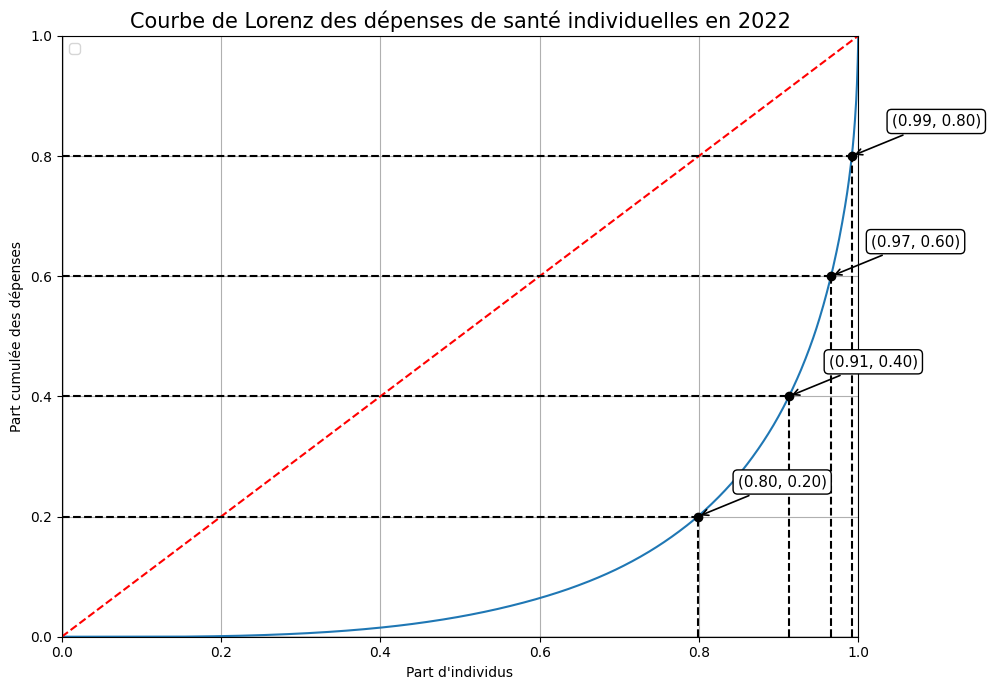

In [ ]:
# Tri croissant des dépenses de santé en 2022
sorted_cost = np.sort(all_expenses_clean["TOTEXP22"])

# Part cumulée des dépenses individuelles
cum_individuals = np.arange(1, len(sorted_cost)+1) / len(sorted_cost)
cum_cost = np.cumsum(sorted_cost) / sorted_cost.sum()

plt.figure(figsize=(10,7))

# Tracé des axes
plt.xlim(0, 1)
plt.ylim(0, 1)

plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

# Courbe de Lorenz
plt.plot(cum_individuals, cum_cost)
plt.plot([0,1],[0,1],'--', color="red")

# Seuils de dépenses
y_seuils = [0.2, 0.4, 0.6, 0.8]
x_seuils = [cum_individuals[np.searchsorted(cum_cost, y)] for y in y_seuils]

for x, y in zip(x_seuils, y_seuils):

    # Lignes verticales/horizontales
    plt.vlines(x, ymin=0, ymax=y, color='black', linestyle='--')
    plt.hlines(y, xmin=0, xmax=x, color='black', linestyle='--')

    # Point d'intersection
    plt.scatter(x, y, color='black', zorder=5)

    # Coordonnées des points d'intersection avec les axes dans des bulles
    plt.annotate(
        f"({x:.2f}, {y:.2f})",
        xy=(x, y),                          # point visé
        xytext=(x + 0.05, y + 0.05),        # position du label
        textcoords="data",
        fontsize=11,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black"),
        arrowprops=dict(
            arrowstyle="->",                # flèche simple
            color="black",
            lw=1.2
        )
    )

plt.title("Courbe de Lorenz des dépenses de santé individuelles en 2022", fontsize=15)
plt.xlabel("Part d'individus")
plt.ylabel("Part cumulée des dépenses")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 3.Prédiction du profil des individus en termes de dépenses de santé
Nous nous proposons à présent de prédire le profil des individus au regard de leur dépenses de santé en 2023.
Pour ce faire, nous allons créer une variable catégorielle attribuant un profil à chaque individu (profil que nous chercherons à prévoir).

*   Profil 1 : individu à coût très élevé (appartenant aux individus ayant les dépenses de santé parmi les 40% les plus élevées en 2023)
*   Profil 2 : individu à coût modéré (appartenant aux deuxième et troisième quintiles de coûts de santé en 2023)
*   Profil 3 : individu à coût faible (appartenant aux premier quintile de coût de santé en 2023)





In [9]:
# Nous créons une variable Profil donnant le profil de chaque individu au regard
# de ses dépenses de santé en 2023
# Cette variable constitura notre variable cible

#On copie le dataframe pour éviter d'écraser ou mélanger les index (identifiants des lignes)
df = all_expenses_clean.copy()

#Nous trions les individus par coûts (dépenses de santé) en 2023
df_ordonne = df.sort_values(by="TOTEXP23").reset_index(drop=True)

# Calcul de la part cumulée des dépenses
df_ordonne["cum_cost_share"] = df_ordonne["TOTEXP23"].cumsum() / df_ordonne["TOTEXP23"].sum()

# Seuils
seuils = [0.2, 0.4, 0.6, 0.8, 1.0]

# Fonction pour définir le profil
def assign_bucket(cum_cost):
    if cum_cost <= seuils[0]: # individu à coût faible
        return 0
    elif cum_cost <= seuils[1]: # individu à coût modéré
        return 1
    else:                     #individu à coût élevé
        return 2

#On applique la fonction assign_bucket à la colonne cum_cost_share de df_ordonne
#pour créer la variable profil
df_ordonne["profil"] = df_ordonne["cum_cost_share"].apply(assign_bucket)

# Grâce à la commande .sort_index(), on revient à l'ordre donné par les index
# pour que l'assignation de la nouvelle se fasse correctement
all_expenses_clean["profil"] = df_ordonne.sort_index()["profil"]



In [10]:
# Affichage du nombre d'individus de chaque profil
all_expenses_clean["profil"].value_counts().sort_index()

profil
0    6076
1     834
2     688
Name: count, dtype: int64

In [14]:
# Sauvegarde
all_expenses_clean.to_csv("all_expenses_profil.csv", index=False)

In [11]:
#Préparation des données pour les algorithmes de machine learning

##############################################################################
####  Définition de la variable cible et des attributs              #########
############################################################################

df = all_expenses_clean.copy()

# Variable cible : profil
y = df["profil"]

# Variables explicatives
X = df.drop([
    "TOTEXP23",
    "profil", "DUPERSID"
], axis=1, errors="ignore")



###############################################################################
#####    Création des échantillons test et train                        #######
###############################################################################

#On sépare les données en deux échantillons train et test

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    stratify=y,    # en cas de classification, cette option sert à conserver les mêmes prportions de chaque classe dans les échantillons d'entrainement et de test
    random_state=42 #utile pour la reproductibilité
)

n_samples, n_features = X_train.shape
print("L'échnatillon d'entrainement contient: {} individus et {} variables explicatives".format(n_samples, n_features))
print("L'échantillon test contient : {} individus".format(X_test.shape[0]))

L'échnatillon d'entrainement contient: 5698 individus et 128 variables explicatives
L'échantillon test contient : 1900 individus


In [13]:
#Nous créons un transformeur preprocess pour prétraiter les données

###############################################################################
############              Preprocessing                               #########
###############################################################################

# Séparation des variables numériques et catégorielles pour le pipeline
num_vars = X.select_dtypes(include=["int64", "float64"]).columns
cat_vars = X.select_dtypes(include=["object", "category"]).columns

###############################################################################
############   Preprocess classique sans log-transformation           #########
###############################################################################

# Les variables numériques correspondent à des variables de santé:
# nous choisissons donc d'attribuer la valeur 0 à leur valeurs manquantes
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
    #on utilise la transformation  (x-median)/ intervalle interquartile pour
    #tenir compte de la distribution très asymétrique des données de sante
    ("scaler", RobustScaler())
])

# Il n'y a aucune valeur manquante parmi les variables catégorielles choisies
# ce qui rend l'imputation facultative
categorical_transformer = Pipeline(steps=[
    #("imputer", SimpleImputer(strategy="constant", fill_value="Not defined")),
#encodage des variables catégorielles sous forme d'indicatrices
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

#On assemble le prétatraitement des variables numériques et cétegorielles
#dans un preprocesseur unique
preproc = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_vars),
        ("cat", categorical_transformer, cat_vars)
    ]
)

###############################################################################
############   Preprocess2 avec  log-transformation                   #########
###############################################################################

# Nous séparons l'unique variable négative(tendance), des autres variables
# toutes positives avant d'appliquer la log-transformation
num_negative = ["tendance"]
num_positive = [col for col in num_vars if col not in num_negative]

log_transformer = FunctionTransformer(lambda x: np.log1p(x))

numeric_positive_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
    ("log", log_transformer),
    ("scaler", StandardScaler())
])

numeric_negative_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preproc2 =  ColumnTransformer(
    transformers=[
        ("num_pos", numeric_positive_transformer, num_positive),
        ("num_neg", numeric_negative_transformer, num_negative),
        ("cat", categorical_transformer, cat_vars)
    ],
    remainder="drop"
)


###############################################################################
############   Preprocess3 pour les réseaux de neurones               #########
###############################################################################

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
    ("scaler", StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocess3 = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_vars),
        ("cat", categorical_transformer, cat_vars)
    ]
)


## Premier modèle: régression logistique

In [ ]:
# Pipeline : Prétraitement + régression logistique

cols_to_remove = ["DUPERSID"]

pipe_logreg = Pipeline([
    ('preprocess', preproc),   # Utilisation du transformer preprocess créé au début de la section 3
    ('logreg', LogisticRegression(max_iter=5000, random_state=42)) #Entrainement du modèle sur les données transfomées
])


# Grille d’hyperparamètres pour la régression logistique
parameters_logreg = {
    'logreg__C': np.logspace(-8, 8, 17, base=2)
}

# Grid Search
clf_logreg = GridSearchCV(
    estimator=pipe_logreg,
    param_grid=parameters_logreg,
    cv=5,
    scoring="balanced_accuracy",
    n_jobs=-1
)

# Entraînement
clf_logreg.fit(X_train, y_train)

# Résultats
print("=== Résultats régression logistique===")
print("Meilleur paramètre (C) :", clf_logreg.best_params_)
print("Accuracy moyenne CV :", clf_logreg.best_score_) #performance lors de la validation croisée
print("Accuracy sur test :", clf_logreg.score(X_test, y_test)) #Vraie performance du modèle sur des données qui n'ont jamais été vues ni lors de l'entrainement, ni lors de la validation croisée


=== Résultats régression logistique===
Meilleur paramètre (C) : {'logreg__C': np.float64(0.00390625)}
Accuracy moyenne CV : 0.3296555504383586
Accuracy sur test : 0.34046521834540266


In [ ]:
#Evaluation des performances du modèle

from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score,
    top_k_accuracy_score
)

# Prédictions
y_pred = clf_logreg.predict(X_test)

print("\n=== Performances globales du modèle ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Balanced accuracy :", balanced_accuracy_score(y_test, y_pred))
print("Macro F1-score :", f1_score(y_test, y_pred, average="macro"))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===")

# Matrice de confusion brute
cm = confusion_matrix(y_test, y_pred)

# Matrice de confusion formatée avec labels explicites
cm_df = pd.DataFrame(
    cm,
    index=[f"Vrai {c}" for c in sorted(y_test.unique())],
    columns=[f"Prédit {c}" for c in sorted(y_test.unique())]
)

print(cm_df)



=== Performances globales du modèle ===
Accuracy : 0.49315789473684213
Balanced accuracy : 0.33925438596491225
Macro F1-score : 0.3051962964577974

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.80      0.52      0.63      1520
           1       0.16      0.47      0.24       304
           2       0.22      0.03      0.05        76

    accuracy                           0.49      1900
   macro avg       0.39      0.34      0.31      1900
weighted avg       0.68      0.49      0.55      1900


=== Confusion Matrix ===
        Prédit 0  Prédit 1  Prédit 2
Vrai 0       792       721         7
Vrai 1       161       143         0
Vrai 2        35        39         2


## 3.2 Deuxième modèle de classification: le modèle SVM

In [ ]:
# Pipeline : Prétraitement + SVM
pipe_svm = Pipeline([
    ('preprocess', preproc2),   # Utilisation du transformer preprocess créé au début de la section 3
    ('svc', LinearSVC(max_iter=5000, dual=False, random_state=42)) #Entrainement du modèle sur les données transfomées
])

# Grille d’hyperparamètres pour SVM
parameters_svm = {'svc__C': [0.01, 0.1, 1, 10, 100]}

# Grid Search
clf_svm = GridSearchCV(
    estimator=pipe_svm,
    param_grid=parameters_svm,
    cv=5,
  #  scoring="balanced_accuracy",
    n_jobs=-1 #utilise tous les CPU disponibles
)

# Entraînement
clf_svm.fit(X_train, y_train)

# Résultats
print("=== Résultats SVM ===")
print("Meilleur paramètre (C) :", clf_svm.best_params_)
print("Accuracy moyenne CV :", clf_svm.best_score_) #performance lors de la validation croisée
print("Accuracy sur test :", clf_svm.score(X_test, y_test)) #Vraie performance du modèle sur des données qui n'ont jamais été vues ni lors de l'entrainement, ni lors de la validation croisée


=== Résultats SVM ===
Meilleur paramètre (C) : {'svc__C': 0.01}
Accuracy moyenne CV : 0.7994031391032455
Accuracy sur test : 0.7994736842105263


In [ ]:
#Evaluation des performances du modèle

from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score,
    top_k_accuracy_score
)

# Prédictions
y_pred = clf_svm.predict(X_test)

print("\n=== Performances globales du modèle ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Balanced accuracy :", balanced_accuracy_score(y_test, y_pred))
print("Macro F1-score :", f1_score(y_test, y_pred, average="macro"))

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===")

# Matrice de confusion brute
cm = confusion_matrix(y_test, y_pred)

# Matrice de confusion formatée avec labels explicites
cm_df = pd.DataFrame(
    cm,
    index=[f"Vrai {c}" for c in sorted(y_test.unique())],
    columns=[f"Prédit {c}" for c in sorted(y_test.unique())]
)

print(cm_df)




=== Performances globales du modèle ===
Accuracy : 0.7994736842105263
Balanced accuracy : 0.3333333333333333
Macro F1-score : 0.2961879691917715

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1519
           1       0.00      0.00      0.00       209
           2       0.00      0.00      0.00       172

    accuracy                           0.80      1900
   macro avg       0.27      0.33      0.30      1900
weighted avg       0.64      0.80      0.71      1900


=== Confusion Matrix ===
        Prédit 0  Prédit 1  Prédit 2
Vrai 0      1519         0         0
Vrai 1       209         0         0
Vrai 2       172         0         0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 3.3 troisième modèle: Random Forest

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Pipeline : prétraitement + Random Forest
pipe_rf = Pipeline([
    ('preprocess', preproc),
    ('rf', RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    ))
])

# Grille d'hyperparamètres pour Random Forest
parameters_rf = {
    'rf__n_estimators': [200, 500],          # nombre d'arbres
    'rf__max_depth': [None, 10, 20],         # profondeur maximale
    'rf__min_samples_split': [2, 5, 10],     # min d'échantillons pour un split
    'rf__min_samples_leaf': [1, 2, 4],       # min d'échantillons par feuille
    'rf__max_features': ['sqrt', 'log2', 0.5]  # nombre de features testés par split
}

# Grid Search : recherche des hyperparamètres par validation croisée
clf_rf = GridSearchCV(
    estimator=pipe_rf,
    param_grid=parameters_rf,
    cv=5,
    scoring="balanced_accuracy",
    n_jobs=-1,
    error_score='raise'
)

# Entraînement
clf_rf.fit(X_train, y_train)

# Résultats
print("=== Résultats Random Forest ===")
print("Meilleurs paramètres :", clf_rf.best_params_)
print("Balanced Accuracy CV :", clf_rf.best_score_)
print("Accuracy test :", clf_rf.score(X_test, y_test))


KeyboardInterrupt: 

## Modèle 4 : XGBoost

In [ ]:
import warnings
warnings.filterwarnings("ignore")


# Encodage des labels
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Vérification des classes
print("Classes encodées :", np.unique(y_train_enc))

# Pipeline
pipe_xgb = Pipeline([
    ('preprocess', preproc),
    ('xgb', XGBClassifier(
        objective='multi:softprob',
        num_class=3,
        eval_metric='mlogloss',
        random_state=42,
        tree_method="hist",
        n_jobs=-1
    ))
])

# Grille
parameters_xgb = {
    'xgb__n_estimators': [200, 500],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.3],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0]
}

# Grid Search
clf_xgb = GridSearchCV(
    estimator=pipe_xgb,
    param_grid=parameters_xgb,
    cv=5,
    scoring="balanced_accuracy",
    n_jobs=-1,
    error_score="raise"
)

# Entraînement
clf_xgb.fit(X_train, y_train_enc)

# Résultats
print("=== Résultats XGBoost ===")
print("Meilleurs paramètres :", clf_xgb.best_params_)
print("Balanced Accuracy CV :", clf_xgb.best_score_)
print("Accuracy test :", clf_xgb.score(X_test, y_test_enc))


KeyboardInterrupt: 

## 3.5 Réseau de neurones / Multilayer Perceptron (MLP)

In [ ]:
from tqdm.notebook import tqdm


# Création d'un module PyTorch qui représente un modèle.
# input_size : nombre de features en entrée
# hidden_sizes : tailles des couches cachées (2 couches : 128 puis 64 neurones)
# output_size : nombre de classes à prédire (par défaut 3)

###############################################################################
###   Préparation des données pour Pythorch                                ###
##############################################################################

class SimpleFeedForward(nn.Module):
    def __init__(self, input_size, hidden_sizes=[128, 64], output_size=3):
        super().__init__()
      #Définition de l'architecture du réseau
      # Linear → ReLU → Linear → ReLU → Linear
        self.classifier = nn.Sequential(
            nn.Linear(input_size, hidden_sizes[0]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[0], hidden_sizes[1]),
            nn.ReLU(),
            nn.Linear(hidden_sizes[1], output_size)
        )

    def forward(self, x):
        return self.classifier(x)

# Le modèle apprend les paramètres utiles aux transformations (médiane,
# écart_interquartile...) sur le train uniquement, ces données seront utilisées
# à l'étape suivante
preprocess3.fit(X_train)

# Transformation des données avec le preprocessing
X_train_t = preprocess3.transform(X_train)
X_test_t  = preprocess3.transform(X_test)

# Conversion en tenseurs
X_train_tensor = torch.tensor(X_train_t, dtype=torch.float32)
X_test_tensor  = torch.tensor(X_test_t, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor  = torch.tensor(y_test.values, dtype=torch.long)

# DataLoader (générateur de mini-batch)
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
test_ds  = TensorDataset(X_test_tensor, y_test_tensor)

trainloader = DataLoader(train_ds, batch_size=64, shuffle=True)
valloader  = DataLoader(test_ds, batch_size=64)

###############################################################################
###                      Boucle d'entrainement                              ###
##############################################################################

def train(model, trainloader, loss_fn, optimizer, epoch, num_epochs):
    model.train()
    loop = tqdm(trainloader, desc=f"Training Epoch [{epoch+1}/{num_epochs}]")

    for inputs, targets in loop:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()


# ============================================================
# 3. Initialisation du modèle, de la loss et de l’optimiseur
# ============================================================

input_size = X_train_t.shape[1]   # Nombre de colonnes après preprocessing
output_size = 3                   # Classes du profil (0/1/2)
hidden_sizes = [128, 64]
lr = 1e-3
num_epochs = 20

net = SimpleFeedForward(input_size, hidden_sizes, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)



###############################################################################
###                     Validation du modèle                               ###
##############################################################################

def validation(model, valloader, loss_fn):
    model.eval()
    total = 0
    running_loss = 0.0
    accuracy = 0.0

    with torch.no_grad():
        loop = tqdm(valloader, desc="Validation")

        for inputs, targets in loop:
            outputs = model(inputs)

            batch_size = inputs.shape[0]
            total += batch_size

            running_loss += batch_size * loss_fn(outputs, targets).item()
            accuracy += (outputs.argmax(dim=1) == targets).sum().item()

            loop.set_postfix(
                val_loss=running_loss / total,
                val_acc=accuracy / total
            )

    return running_loss / total, accuracy / total

###############################################################################
###                     Entrainement du modèle                              ###
##############################################################################

input_size = X_train_t.shape[1]   # nb de colonnes après preprocess
model = SimpleFeedForward(input_size=input_size, hidden_sizes=[128, 64], output_size=3)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 20

for epoch in range(num_epochs):
    train(model, trainloader, criterion, optimizer, epoch, num_epochs)
    val_loss, val_acc = validation(model, valloader, criterion)

# ============================================================
# 5. Boucle d'entraînement sur le dataset de santé
# ============================================================

for epoch in range(num_epochs):

    train(net, trainloader, criterion, optimizer, epoch, num_epochs)

    val_loss, val_acc = validation(net, valloader, criterion)

    print(f"Epoch {epoch+1}/{num_epochs} - Validation loss: {val_loss:.4f} - acc: {val_acc:.4f}")

# ============================================================
# 6. Évaluation finale sur le jeu de test (jamais vu)
# ============================================================

test_loss, test_acc = validation(net, valloader, criterion)
print(f"Test accuracy: {test_acc:.4f} | Test loss: {test_loss:.4f}")




Training Epoch [1/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [2/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [3/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [4/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [5/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [6/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [7/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [8/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [9/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [10/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [11/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [12/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [13/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [14/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [15/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [16/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [17/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [18/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [19/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [20/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Training Epoch [1/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 1/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [2/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 2/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [3/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 3/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [4/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 4/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [5/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 5/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [6/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 6/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [7/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 7/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [8/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 8/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [9/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 9/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [10/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 10/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [11/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 11/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [12/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 12/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [13/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 13/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [14/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 14/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [15/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 15/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [16/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 16/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [17/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 17/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [18/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 18/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [19/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 19/20 - Validation loss: 1.1688 - acc: 0.1279


Training Epoch [20/20]:   0%|          | 0/90 [00:00<?, ?it/s]

Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Epoch 20/20 - Validation loss: 1.1688 - acc: 0.1279


Validation:   0%|          | 0/30 [00:00<?, ?it/s]

Test accuracy: 0.1279 | Test loss: 1.1688


In [ ]:
X_train_t.max(), X_train_t.min(), np.isnan(X_train_t).sum()


(np.float64(1.976961168052253e+17),
 np.float64(-3.716647323269057e+17),
 np.int64(0))

/tmp/ipython-input-3821498107.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dep_age = all_expenses_clean.groupby("age_class")["TOTEXP22"].sum()


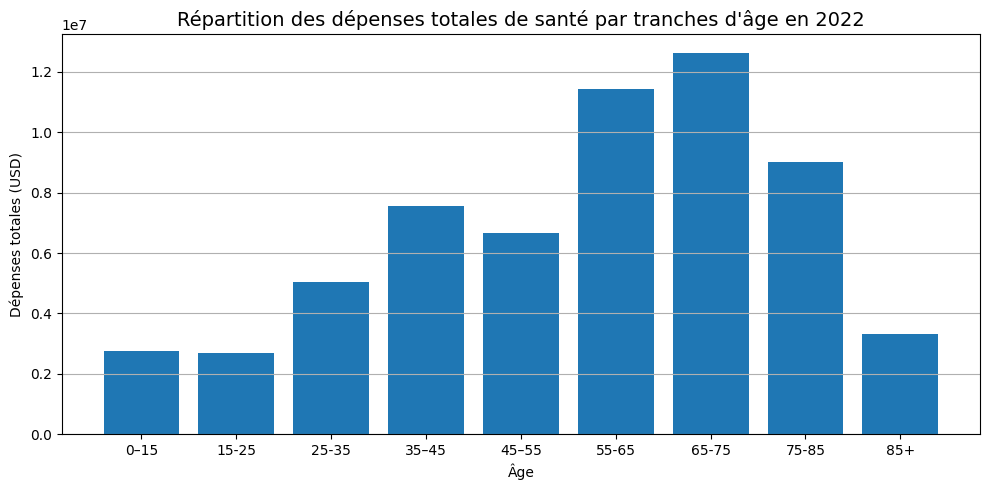

In [ ]:
# Création des classes d'âge
bins = [0, 15, 25, 35, 45,55, 65,75,85,  120]  # limites
labels = ["0–15","15-25","25-35", "35–45", "45–55","55-65","65-75", "75-85", "85+"]  # noms des classes

all_expenses_clean["age_class"] = pd.cut(
    all_expenses_clean["AGE22X"],
    bins=bins,
    labels=labels,
    right=False  # intervalle fermé à gauche [ )
)

dep_age = all_expenses_clean.groupby("age_class")["TOTEXP22"].sum()

plt.figure(figsize=(10,5))
plt.bar(dep_age.index, dep_age.values)

plt.title("Répartition des dépenses totales de santé par tranches d'âge en 2022", fontsize=14)
plt.xlabel("Âge")
plt.ylabel("Dépenses totales (USD)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
Chaque étape de ta boucle fait :

Calcul de la perte

Calcul des gradients (backprop)

Mise à jour des poids

Et recommence sur un nouveau mini-batch

L(θ)=−logpθ​(y∣x)

θ=θ−η⋅∂L​/ ∂θ

Les réseaux de neurones détestent :

les variables catégorielles encodées en one-hot → sparse high-dim

les distributions très asymétriques

les très fortes colinéarités

les dizaines de variables sans relation linéaire

les effets d’interaction complexes

Ton dataset, typique des dépenses de santé, contient :

variables médicales asymétriques

beaucoup de zéros

beaucoup de valeurs extrêmes

des colonnes fortement corrélées

des variables catégorielles encodées large

➡️ RandomForest / XGBoost écrasent les MLP en tabulaire.

Les MLP ne brillent que dans :

vision

audio

texte

grandes bases continues propres

SyntaxError: unterminated string literal (detected at line 1) (ipython-input-3107015130.py, line 1)